In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train_v9rqX0R.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Basic Checks

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.shape

(8523, 12)

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Exploratory Data Analysis

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
## for categorical data

categorical = []

for column in df.columns:
    if df[column].dtype == object:
        categorical.append(column)
print('categorical columns are: ', categorical)    

categorical columns are:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [12]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
## for numerical data

numerical = []

for column in df.columns:
    if df[column].dtype == float:
        numerical.append(column)
print('numerical columns are: ', numerical) 

numerical columns are:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


## Feature Engineering

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
## Missing Values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df.loc[df['Item_Weight'].isnull() == True, 'Item_Weight'] = np.median(df.Item_Weight.dropna(axis=0))

In [17]:
st.mode(df.Outlet_Size)

ModeResult(mode=array(['Medium'], dtype=object), count=array([2793]))

In [18]:
df.loc[df['Outlet_Size'].isnull() == True, 'Outlet_Size'] = df['Outlet_Size'].mode()

In [19]:
df.loc[df['Outlet_Size'].isnull() == True, 'Outlet_Size'] = 'medium'

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
## Handling categorical Value

lc = LabelEncoder()

for columns in df:
    df[columns] = lc.fit_transform(df[columns])

In [23]:
df.dtypes

Item_Identifier              int32
Item_Weight                  int64
Item_Fat_Content             int32
Item_Visibility              int64
Item_Type                    int32
Item_MRP                     int64
Outlet_Identifier            int32
Outlet_Establishment_Year    int64
Outlet_Size                  int32
Outlet_Location_Type         int32
Outlet_Type                  int32
Item_Outlet_Sales            int64
dtype: object

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,3,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


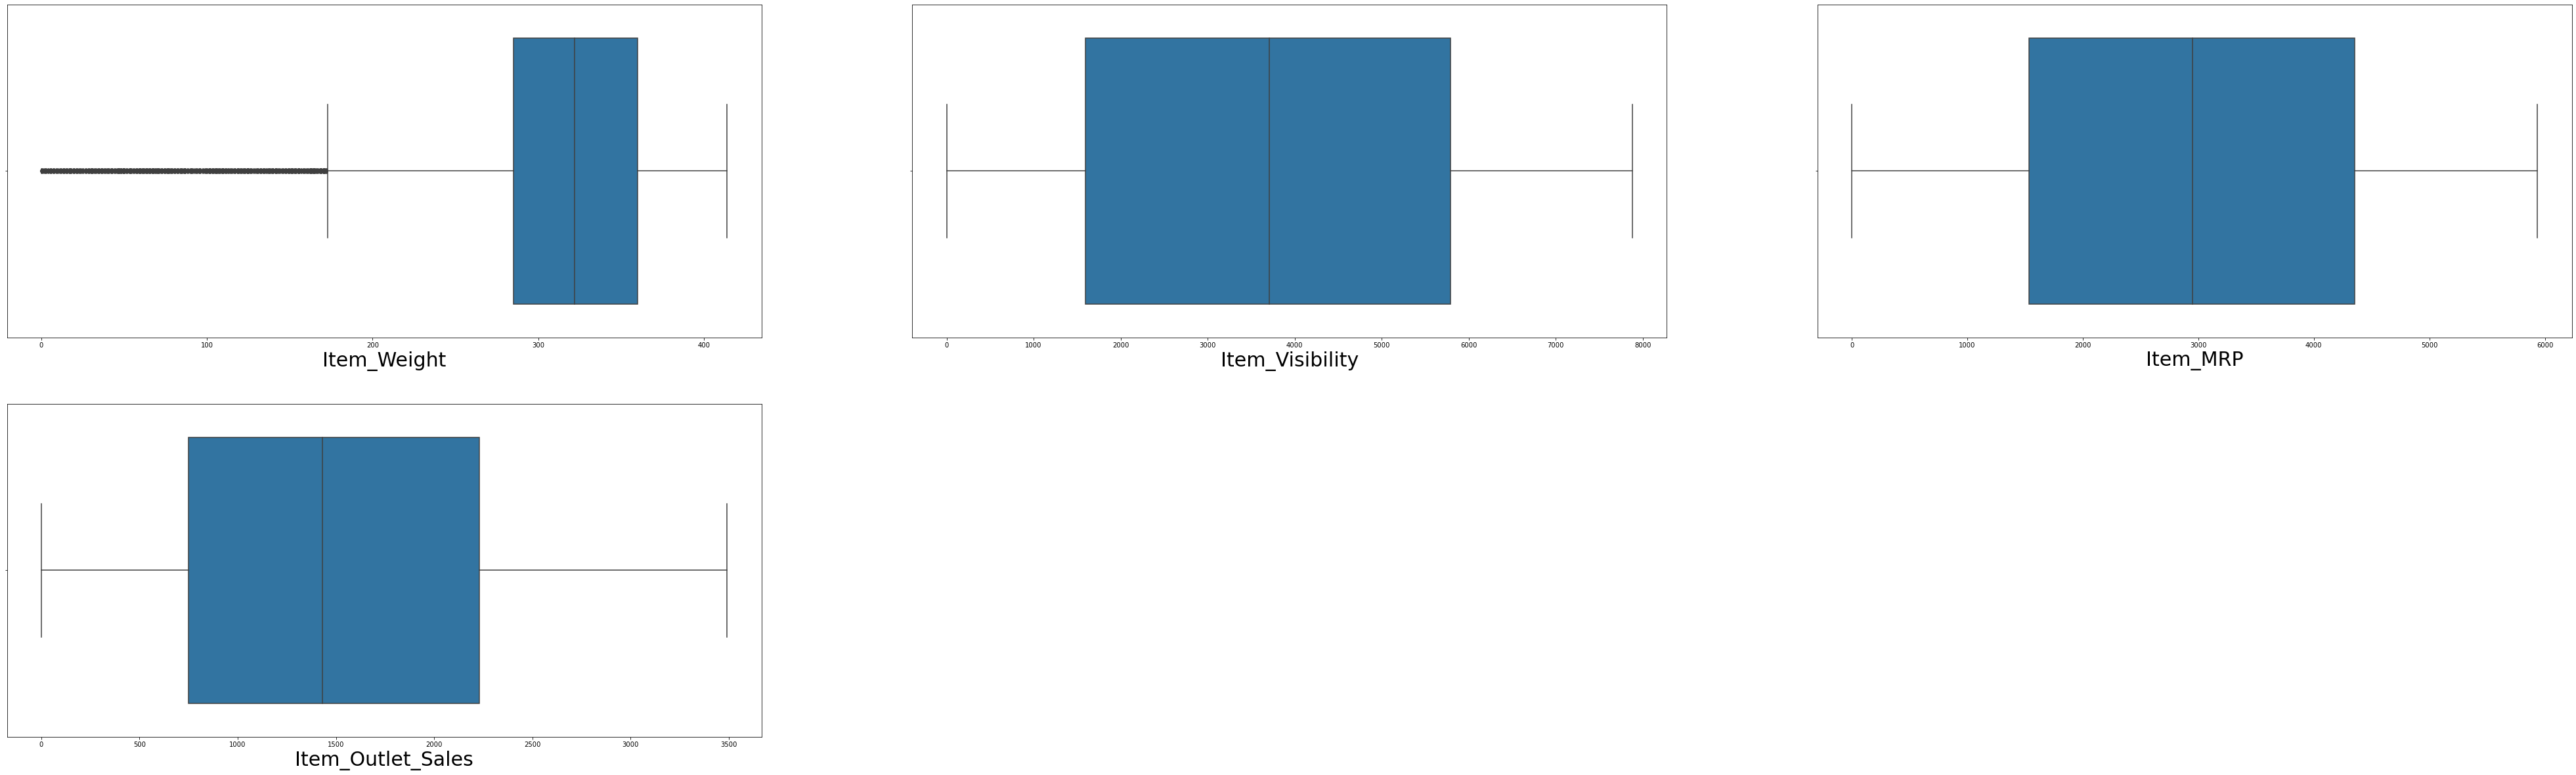

In [25]:
## Handling Outlier Data

box = numerical

plt.figure(figsize=(70,110), facecolor='white')
plot_number = 1

for column in box:
    if plot_number <= 5:
        ax = plt.subplot(10,3,plot_number)
        sns.boxplot(x=df[column], data=df)
        plt.xlabel(column, fontsize=30)
    plot_number += 1

In [26]:
IQR = st.iqr(df.Item_Weight, interpolation = 'midpoint')

IQR

75.0

In [27]:
Q1 = df.Item_Weight.quantile(0.25)

Q3 = df.Item_Weight.quantile(0.75)

min_limit = Q1 - 1.5*IQR

max_limit = Q1 = 1.5*IQR

In [28]:
len(df.loc[df.Item_Weight > max_limit])

7813

In [29]:
print('The Item_Weight has more than 5%, therefore no imputation is required')

The Item_Weight has more than 5%, therefore no imputation is required


In [47]:
## Creating X & y

from sklearn.model_selection import train_test_split

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.685990,1,0.084275,4,0.941890,9,4,1,0,1,2540
1,8,0.137681,2,0.111689,14,0.079670,3,8,1,2,2,422
2,662,0.905797,1,0.090748,10,0.488631,9,4,1,0,1,1639
3,1121,0.946860,2,0.000000,6,0.711976,0,3,3,2,0,670
4,1297,0.640097,1,0.000000,9,0.105609,1,1,0,2,1,865


In [52]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df.Item_Outlet_Sales

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Scaling & Transformation

In [54]:
scale = MinMaxScaler()

df[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scale.fit_transform(df[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.685990,1,0.084275,4,0.941890,9,4,1,0,1,2540
1,8,0.137681,2,0.111689,14,0.079670,3,8,1,2,2,422
2,662,0.905797,1,0.090748,10,0.488631,9,4,1,0,1,1639
3,1121,0.946860,2,0.000000,6,0.711976,0,3,3,2,0,670
4,1297,0.640097,1,0.000000,9,0.105609,1,1,0,2,1,865


## Feature Selection

In [56]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.028774,-0.098114,-0.029999,-0.017973,0.014329,-0.008602,-0.014288,0.000855,0.003656,-0.001178,0.005916
Item_Weight,0.028774,1.000000,-0.014364,-0.008986,0.033759,0.022728,-0.009593,-0.078484,-0.030807,0.014510,0.045657,0.012351
Item_Fat_Content,-0.098114,-0.014364,1.000000,0.043042,-0.115958,-0.001187,-0.002357,0.001595,-0.004795,-0.004102,-0.004214,0.008599
Item_Visibility,-0.029999,-0.008986,0.043042,1.000000,-0.043491,0.005482,-0.073962,-0.053923,0.065836,-0.018067,-0.125695,-0.109471
Item_Type,-0.017973,0.033759,-0.115958,-0.043491,1.000000,0.038449,0.001656,0.006527,0.000827,0.003084,0.003053,0.020094
Item_MRP,0.014329,0.022728,-0.001187,0.005482,0.038449,1.000000,0.003005,0.003730,-0.001931,0.000828,-0.001828,0.573191
Outlet_Identifier,-0.008602,-0.009593,-0.002357,-0.073962,0.001656,0.003005,1.000000,-0.030969,0.053224,-0.716176,0.099873,0.200320
Outlet_Establishment_Year,-0.014288,-0.078484,0.001595,-0.053923,0.006527,0.003730,-0.030969,1.000000,0.360690,0.042005,-0.040040,0.024477
Outlet_Size,0.000855,-0.030807,-0.004795,0.065836,0.000827,-0.001931,0.053224,0.360690,1.000000,-0.290216,-0.432062,-0.190131
Outlet_Location_Type,0.003656,0.014510,-0.004102,-0.018067,0.003084,0.000828,-0.716176,0.042005,-0.290216,1.000000,0.467219,0.074671


<AxesSubplot:>

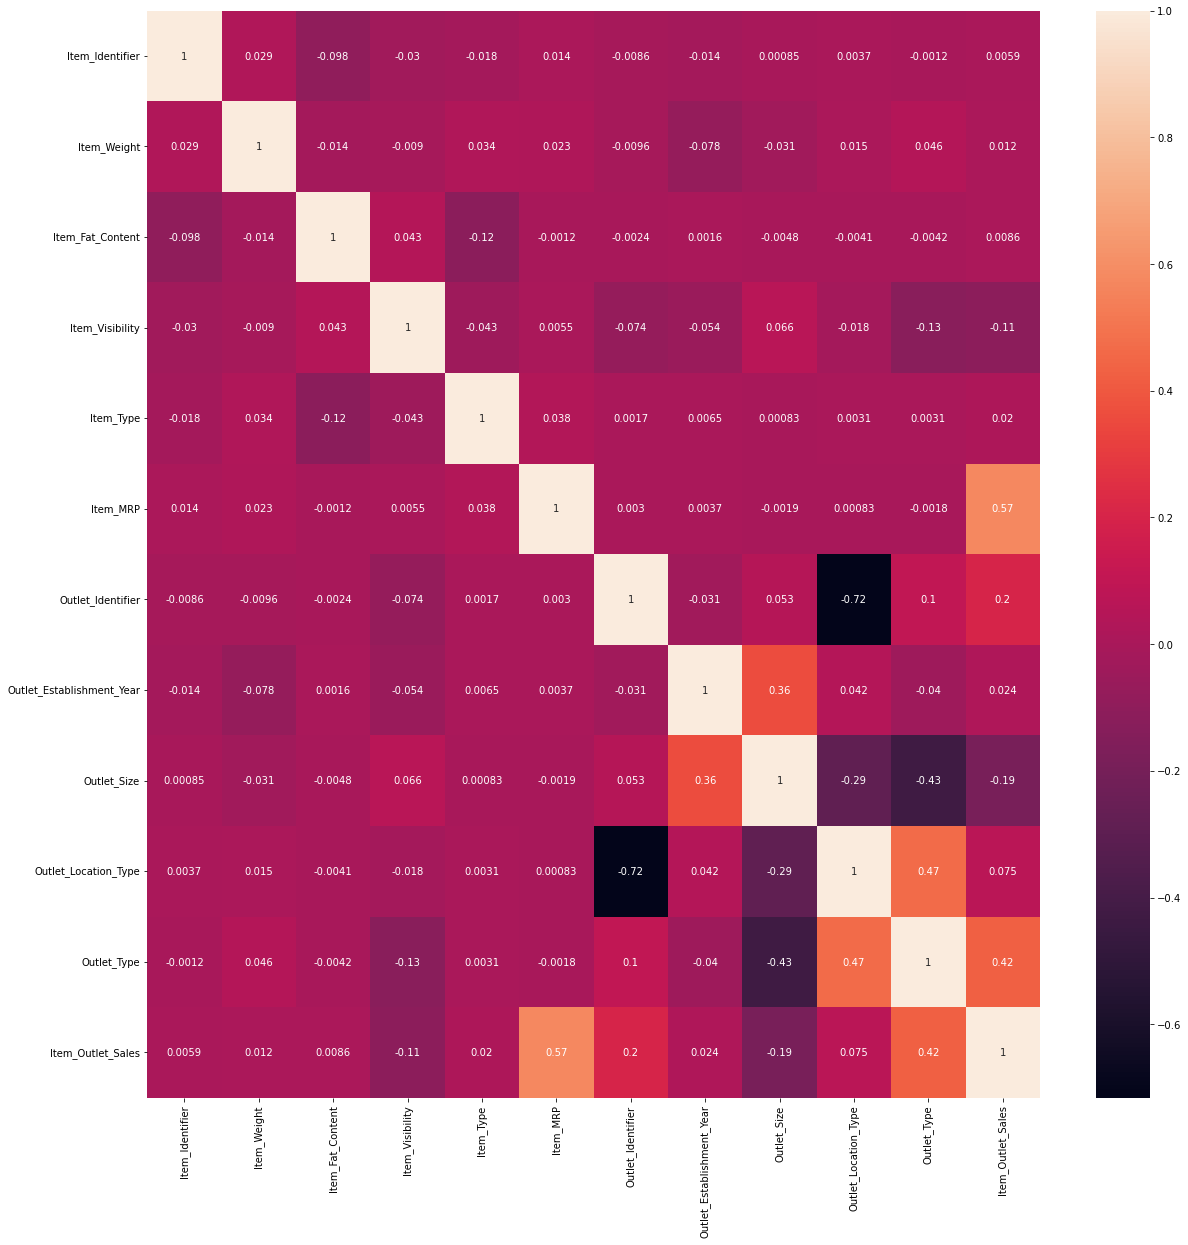

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [58]:
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [59]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales              int64
dtype: object

## Creating Model & Evaluation

In [60]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [61]:
pred = dtr.predict(X_test)

In [64]:
from sklearn.metrics import r2_score